In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from transformer import transformer_model
from PIL import Image

In [2]:
model = transformer_model()

created


In [3]:
# load pretrained model
model.load_weights('model.h5')

In [4]:
def load_img(path_to_img):
    max_dim = 2048
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.uint8)
    img = img[tf.newaxis, :]
    img = tf.cast(img, tf.float32)
    return img

In [5]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)

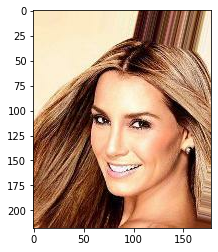

In [6]:
# load and display original image
my_img = load_img('image/000001.jpg')
imshow(my_img.numpy().astype('uint8'))

1.302030086517334


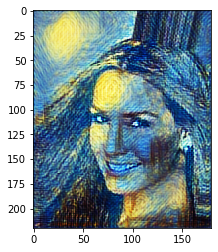

In [7]:
# display tranfer style image
import time
start = time.time()
results = model.predict(my_img)
imshow(results[0].astype(np.uint8))
end = time.time()
print(end - start)

In [8]:
# save image
output = tf.dtypes.cast(results[0], tf.uint8)
encoded_str = tf.image.encode_jpeg(tf.squeeze(output),quality=100)
tf.io.write_file('outputs/demo.jpg', encoded_str)